# Deriving New Columns & Defining Python Functions

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-oriented-with-the-data" data-toc-modified-id="Getting-oriented-with-the-data-1">Getting oriented with the data</a></span></li><li><span><a href="#Deriving-new-columns-from-existing-data" data-toc-modified-id="Deriving-new-columns-from-existing-data-2">Deriving new columns from existing data</a></span></li><li><span><a href="#Applying-functions-to-DataFrames" data-toc-modified-id="Applying-functions-to-DataFrames-3">Applying functions to DataFrames</a></span></li><li><span><a href="#Selecting-multiple-columns" data-toc-modified-id="Selecting-multiple-columns-4">Selecting multiple columns</a></span></li><li><span><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-5">Practice Problems</a></span></li></ul></div>

### Getting oriented with the data

For this lesson, we will be using web traffic data from Watsi, an organization that allows people to fund healthcare costs for people around the world.

In [44]:
# Import the pandas library
import pandas as pd

In [45]:
# Give the DataFrame a variable name and preview the first five rows
data = pd.read_csv('/users/bm/downloads/python-for-data-analysis/clone_of_python_tutorial.csv')

# Replace missing values with ''
data = data.fillna('')

data.head()

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop
3,,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,,,Desktop
4,https://watsi.org/fund-treatments,2016-02-14 19:30:08,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,ANDREE N,watsi.org,,Desktop


### Deriving new columns from existing data

In [46]:
# Count the values in the platform column to get an idea of the distribution of the different 
# platforms used to view pages on Watsi's site.

data['platform'].value_counts()

Desktop       3934
iPhone         515
Android        388
iPad           154
Opera Mini       7
BlackBerry       1
IEMobile         1
Name: platform, dtype: int64

In [47]:
# To add a column to the DataFrame, assign values to a new column name.
data['new_column'] = 2 # the value for all rows

# Output a few rows of the DataFrame, to see the new column
data[:3]

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,new_column
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop,2
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,2
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,2


In [48]:
# Assigning values to an existing column will overwrite that column
data['new_column'] = 'overwritten'
data[:3]

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,new_column
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop,overwritten
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,overwritten
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,overwritten


### Applying functions to DataFrames

The `.apply()` method allows you to apply a function to a column of a DataFrame.

In [49]:
# Create a list to filter values in the platform column
mobile = ['iPhone', 'Android', 'iPad', 'Opera Mini', 'IEMobile', 'BlackBerry']

# Define a function
def filter_desktop_mobile(platform):
    if platform in mobile:
        return 'Mobile'
    elif platform == 'Desktop':
        return 'Desktop'
    else:
        return 'Not known'

In [50]:
# Apply the function to the platform column
data['platform'].apply(filter_desktop_mobile)

0       Desktop
1       Desktop
2       Desktop
3       Desktop
4       Desktop
         ...   
4995    Desktop
4996    Desktop
4997     Mobile
4998     Mobile
4999    Desktop
Name: platform, Length: 5000, dtype: object

In [51]:
# To store the values in a new column
data['platform_type'] = data['platform'].apply(filter_desktop_mobile)

### Selecting multiple columns 

To select multiple columns, pass a list of column names into the square brackets:

In [52]:
# Output some rows with different values to make sure our function worked
data[['platform', 'platform_type']][14:18]

,platform,platform_type
14,Desktop,Desktop
15,Android,Mobile
16,iPhone,Mobile
17,Desktop,Desktop


<AxesSubplot:>

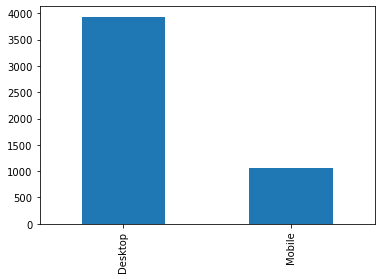

In [53]:
# Count the values in platform_type and use a bar chart to compare the values
data['platform_type'].value_counts().plot(kind='bar')

### Practice Problems

1. Store the length of each row's referrer value in a new column.

In [54]:
# Define a function to return length of referrer values
def get_length(referrer):
    return len(referrer)

In [55]:
# Apply the function and assign values returned by the function to a new column
data['referrer_length'] = data['referrer'].apply(get_length)

In [56]:
# Check column values to verify function output
data[['referrer', 'referrer_length']].head()

,referrer,referrer_length
0,https://www.google.com/,23
1,https://themeteorchef.com/snippets/making-use-...,63
2,https://watsi.org/,18
3,,0
4,https://watsi.org/fund-treatments,33


2. Create a derived column from referrer_domain that filters domain types of 'organization' (for '.org') and 'company' (for '.com'), labeling any others as 'other'. Then plot a bar chart of their relative frequency. Hint: Use the in keyword creatively.

In [57]:
# Define a function to filter the required data
def filter(domain):
    if '.com' in domain:
        return 'company'
    elif '.org' in domain:
        return 'organization'
    else:
        return 'other'

In [58]:
# Function is applied to 'referrer_domain' column
data['domain_type'] = data['referrer_domain'].apply(filter)

In [59]:
# Output some rows to verify new column values
data[['referrer_domain', 'domain_type']].head()

,referrer_domain,domain_type
0,google,other
1,themeteorchef.com,company
2,watsi.org,organization
3,,other
4,watsi.org,organization


<AxesSubplot:>

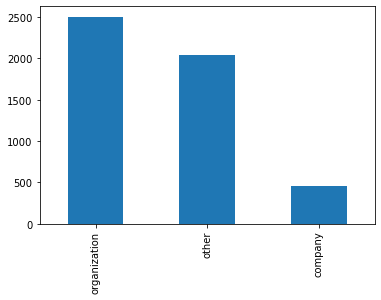

In [60]:
# Plot data from the 'domain_type' column
data['domain_type'].value_counts().plot(kind='bar')